In [1]:
import cv2
import tensorflow as tf

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
import os

In [5]:
image_path=r"C:\Users\mandl\Downloads\test\TomatoYellowCurlVirus1.JPG"

In [6]:
img=cv2.imread(image_path)

In [7]:
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

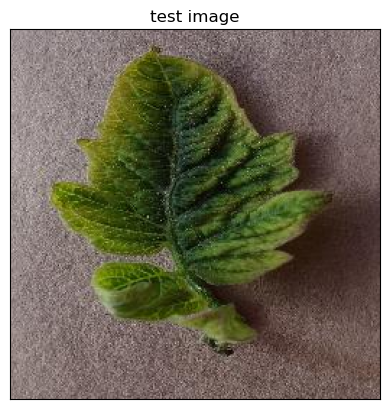

In [8]:
plt.imshow(img)
plt.title("test image")
plt.xticks([])
plt.yticks([])
plt.show()

In [9]:
image=tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr=tf.keras.preprocessing.image.img_to_array(image)
input_arr=np.array(input_arr)
print(input_arr.shape)

(128, 128, 3)


In [10]:
input_arr = np.expand_dims(input_arr, axis=1) 

In [11]:
input_arr = input_arr.reshape(-1, 128, 128, 3)

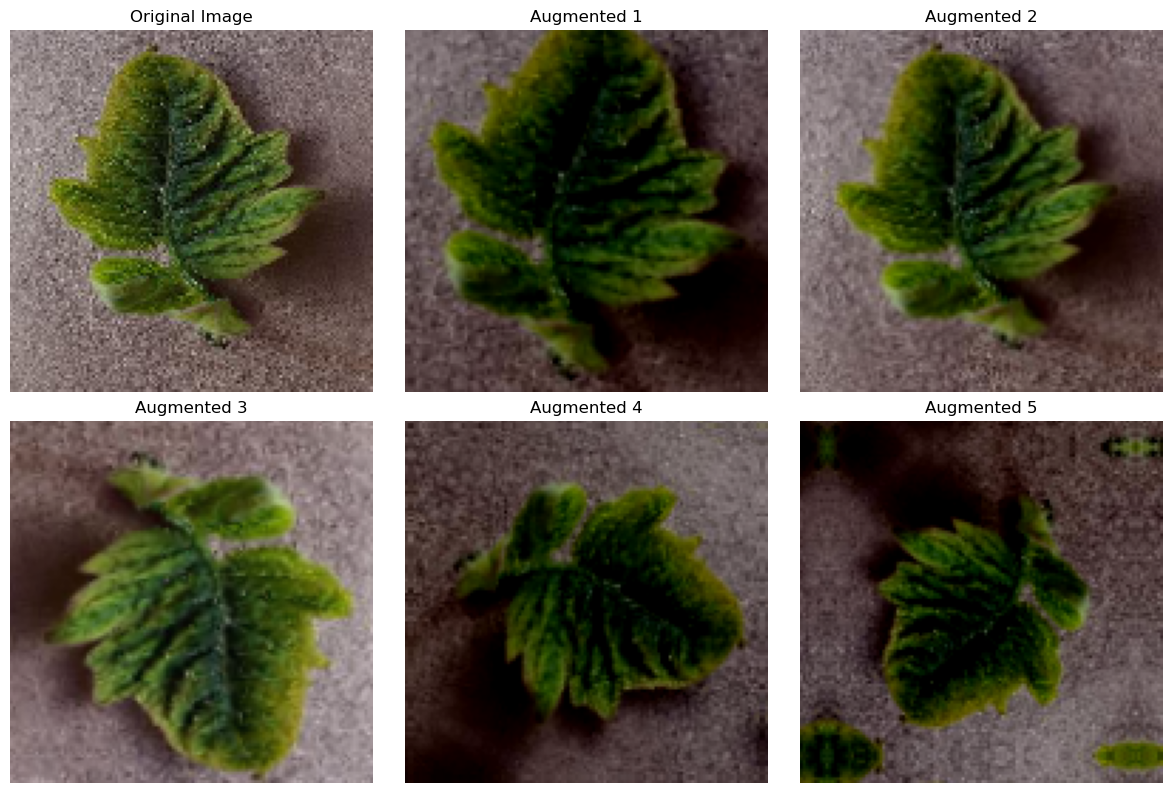

In [12]:

# Load the image
image_path = r"C:\Users\mandl\Downloads\test\TomatoYellowCurlVirus1.JPG"
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(128, 128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.expand_dims(input_arr, axis=0)  # Expand dimensions for batch compatibility

# Image Augmentation Layer
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),      # Flip horizontally and vertically
    tf.keras.layers.RandomRotation(0.2),                        # Rotate by 20%
    tf.keras.layers.RandomZoom(0.2),                            # Zoom in/out by 20%
    tf.keras.layers.RandomContrast(0.2),                        # Adjust contrast by 20%
    tf.keras.layers.RandomBrightness(0.2)                       # Adjust brightness by 20%
])

# Apply augmentation
num_augmentations = 5  # Number of augmented images to display
augmented_images = [data_augmentation(input_arr, training=True)[0].numpy().astype(np.uint8) for _ in range(num_augmentations)]

# Display original and augmented images
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.flatten()

# Show original image
axes[0].imshow(image)
axes[0].set_title("Original Image")
axes[0].axis('off')

# Show augmented images
for i, img in enumerate(augmented_images):
    axes[i + 1].imshow(img)
    axes[i + 1].set_title(f"Augmented {i+1}")
    axes[i + 1].axis('off')

# Hide any unused axes (in case fewer augmentations are displayed)
for j in range(len(augmented_images) + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


In [14]:
cnn = tf.keras.models.Sequential()

# Convolutional Block 1
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128, 128, 3]))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Convolutional Block 2
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Convolutional Block 3
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Convolutional Block 4
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Convolutional Block 5
cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Dropout and Fully Connected Layer
cnn.add(tf.keras.layers.Dropout(0.25))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=1500, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4))
cnn.add(tf.keras.layers.Dense(units=6, activation='softmax'))  

cnn.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

C:\Users\mandl\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │      12,289,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │           9,006 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,010,730 (64.89 MB)

 Trainable params: 17,010,730 (64.89 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
train_set = tf.keras.utils.image_dataset_from_directory(
    r"C:\Users\mandl\Downloads\train",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
).map(lambda x, y: (data_augmentation(x, training=True), y))

Found 10769 files belonging to 6 classes.


In [18]:
valid_set = tf.keras.utils.image_dataset_from_directory(
    r"C:\Users\mandl\Downloads\valid",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 2527 files belonging to 6 classes.


In [20]:
class_name = valid_set.class_names
print(class_name)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew']


In [23]:
from PIL import Image
import os

def remove_corrupted_images(directory):
    num_corrupted = 0
    for subdir, _, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(subdir, file)
            try:
                img = Image.open(file_path)
                img.verify()  # Verify that it is a valid image
            except (IOError, SyntaxError) as e:
                print(f"Removing corrupted image: {file_path}")
                os.remove(file_path)  # Remove the corrupted file
                num_corrupted += 1
    return num_corrupted

# Check and remove corrupted images from both train and validation directories
num_train_corrupted = remove_corrupted_images(r"C:\Users\mandl\Downloads\train")
num_valid_corrupted = remove_corrupted_images(r"C:\Users\mandl\Downloads\valid")

print(f"Removed {num_train_corrupted} corrupted images from training set.")
print(f"Removed {num_valid_corrupted} corrupted images from validation set.")

Removed 0 corrupted images from training set.
Removed 0 corrupted images from validation set.


In [24]:
import os

def check_missing_files(directory):
    missing_files = []
    for subdir, _, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(subdir, file)
            if not os.path.exists(file_path):
                missing_files.append(file_path)
    return missing_files

# Check for missing files in the validation directory
missing_files = check_missing_files(r"C:\Users\mandl\Downloads\valid")
if missing_files:
    print(f"Missing files: {missing_files}")
else:
    print("No missing files.")

No missing files.


In [25]:
training_history = cnn.fit(x=train_set,validation_data=valid_set,epochs=50)

Epoch 1/50
337/337 ━━━━━━━━━━━━━━━━━━━━ 572s 2s/step - accuracy: 0.3725 - loss: 1.7642 - val_accuracy: 0.6961 - val_loss: 0.7755
Epoch 2/50
337/337 ━━━━━━━━━━━━━━━━━━━━ 565s 2s/step - accuracy: 0.6979 - loss: 0.7519 - val_accuracy: 0.8298 - val_loss: 0.4165
Epoch 3/50
337/337 ━━━━━━━━━━━━━━━━━━━━ 563s 2s/step - accuracy: 0.8070 - loss: 0.5002 - val_accuracy: 0.9094 - val_loss: 0.2575
Epoch 4/50
337/337 ━━━━━━━━━━━━━━━━━━━━ 564s 2s/step - accuracy: 0.8688 - loss: 0.3768 - val_accuracy: 0.9288 - val_loss: 0.1887
Epoch 5/50
337/337 ━━━━━━━━━━━━━━━━━━━━ 566s 2s/step - accuracy: 0.9302 - loss: 0.2011 - val_accuracy: 0.9129 - val_loss: 0.2318
Epoch 6/50
337/337 ━━━━━━━━━━━━━━━━━━━━ 570s 2s/step - accuracy: 0.9405 - loss: 0.1762 - val_accuracy: 0.9632 - val_loss: 0.1168
Epoch 7/50
337/337 ━━━━━━━━━━━━━━━━━━━━ 531s 2s/step - accuracy: 0.9401 - loss: 0.1683 - val_accuracy: 0.9648 - val_loss: 0.1006
Epoch 8/50
337/337 ━━━━━━━━━━━━━━━━━━━━ 365s 1s/step - accuracy: 0.9556 - loss: 0.1143 - val_accu

KeyboardInterrupt: 

In [20]:
train_loss, train_acc = cnn.evaluate(train_set)
print('Training accuracy:', train_acc)

337/337 ━━━━━━━━━━━━━━━━━━━━ 207s 606ms/step - accuracy: 0.1760 - loss: 3.9390
Training accuracy: 0.1718822568655014


In [27]:
val_loss, val_acc = cnn.evaluate(valid_set)
print('Validation accuracy:', val_acc)

79/79 ━━━━━━━━━━━━━━━━━━━━ 30s 384ms/step - accuracy: 0.9798 - loss: 0.0677
Validation accuracy: 0.9833794832229614


In [28]:
cnn.save('trained_plant_disease_model.keras')

Found 2527 files belonging to 6 classes.
79/79 ━━━━━━━━━━━━━━━━━━━━ 42s 526ms/step


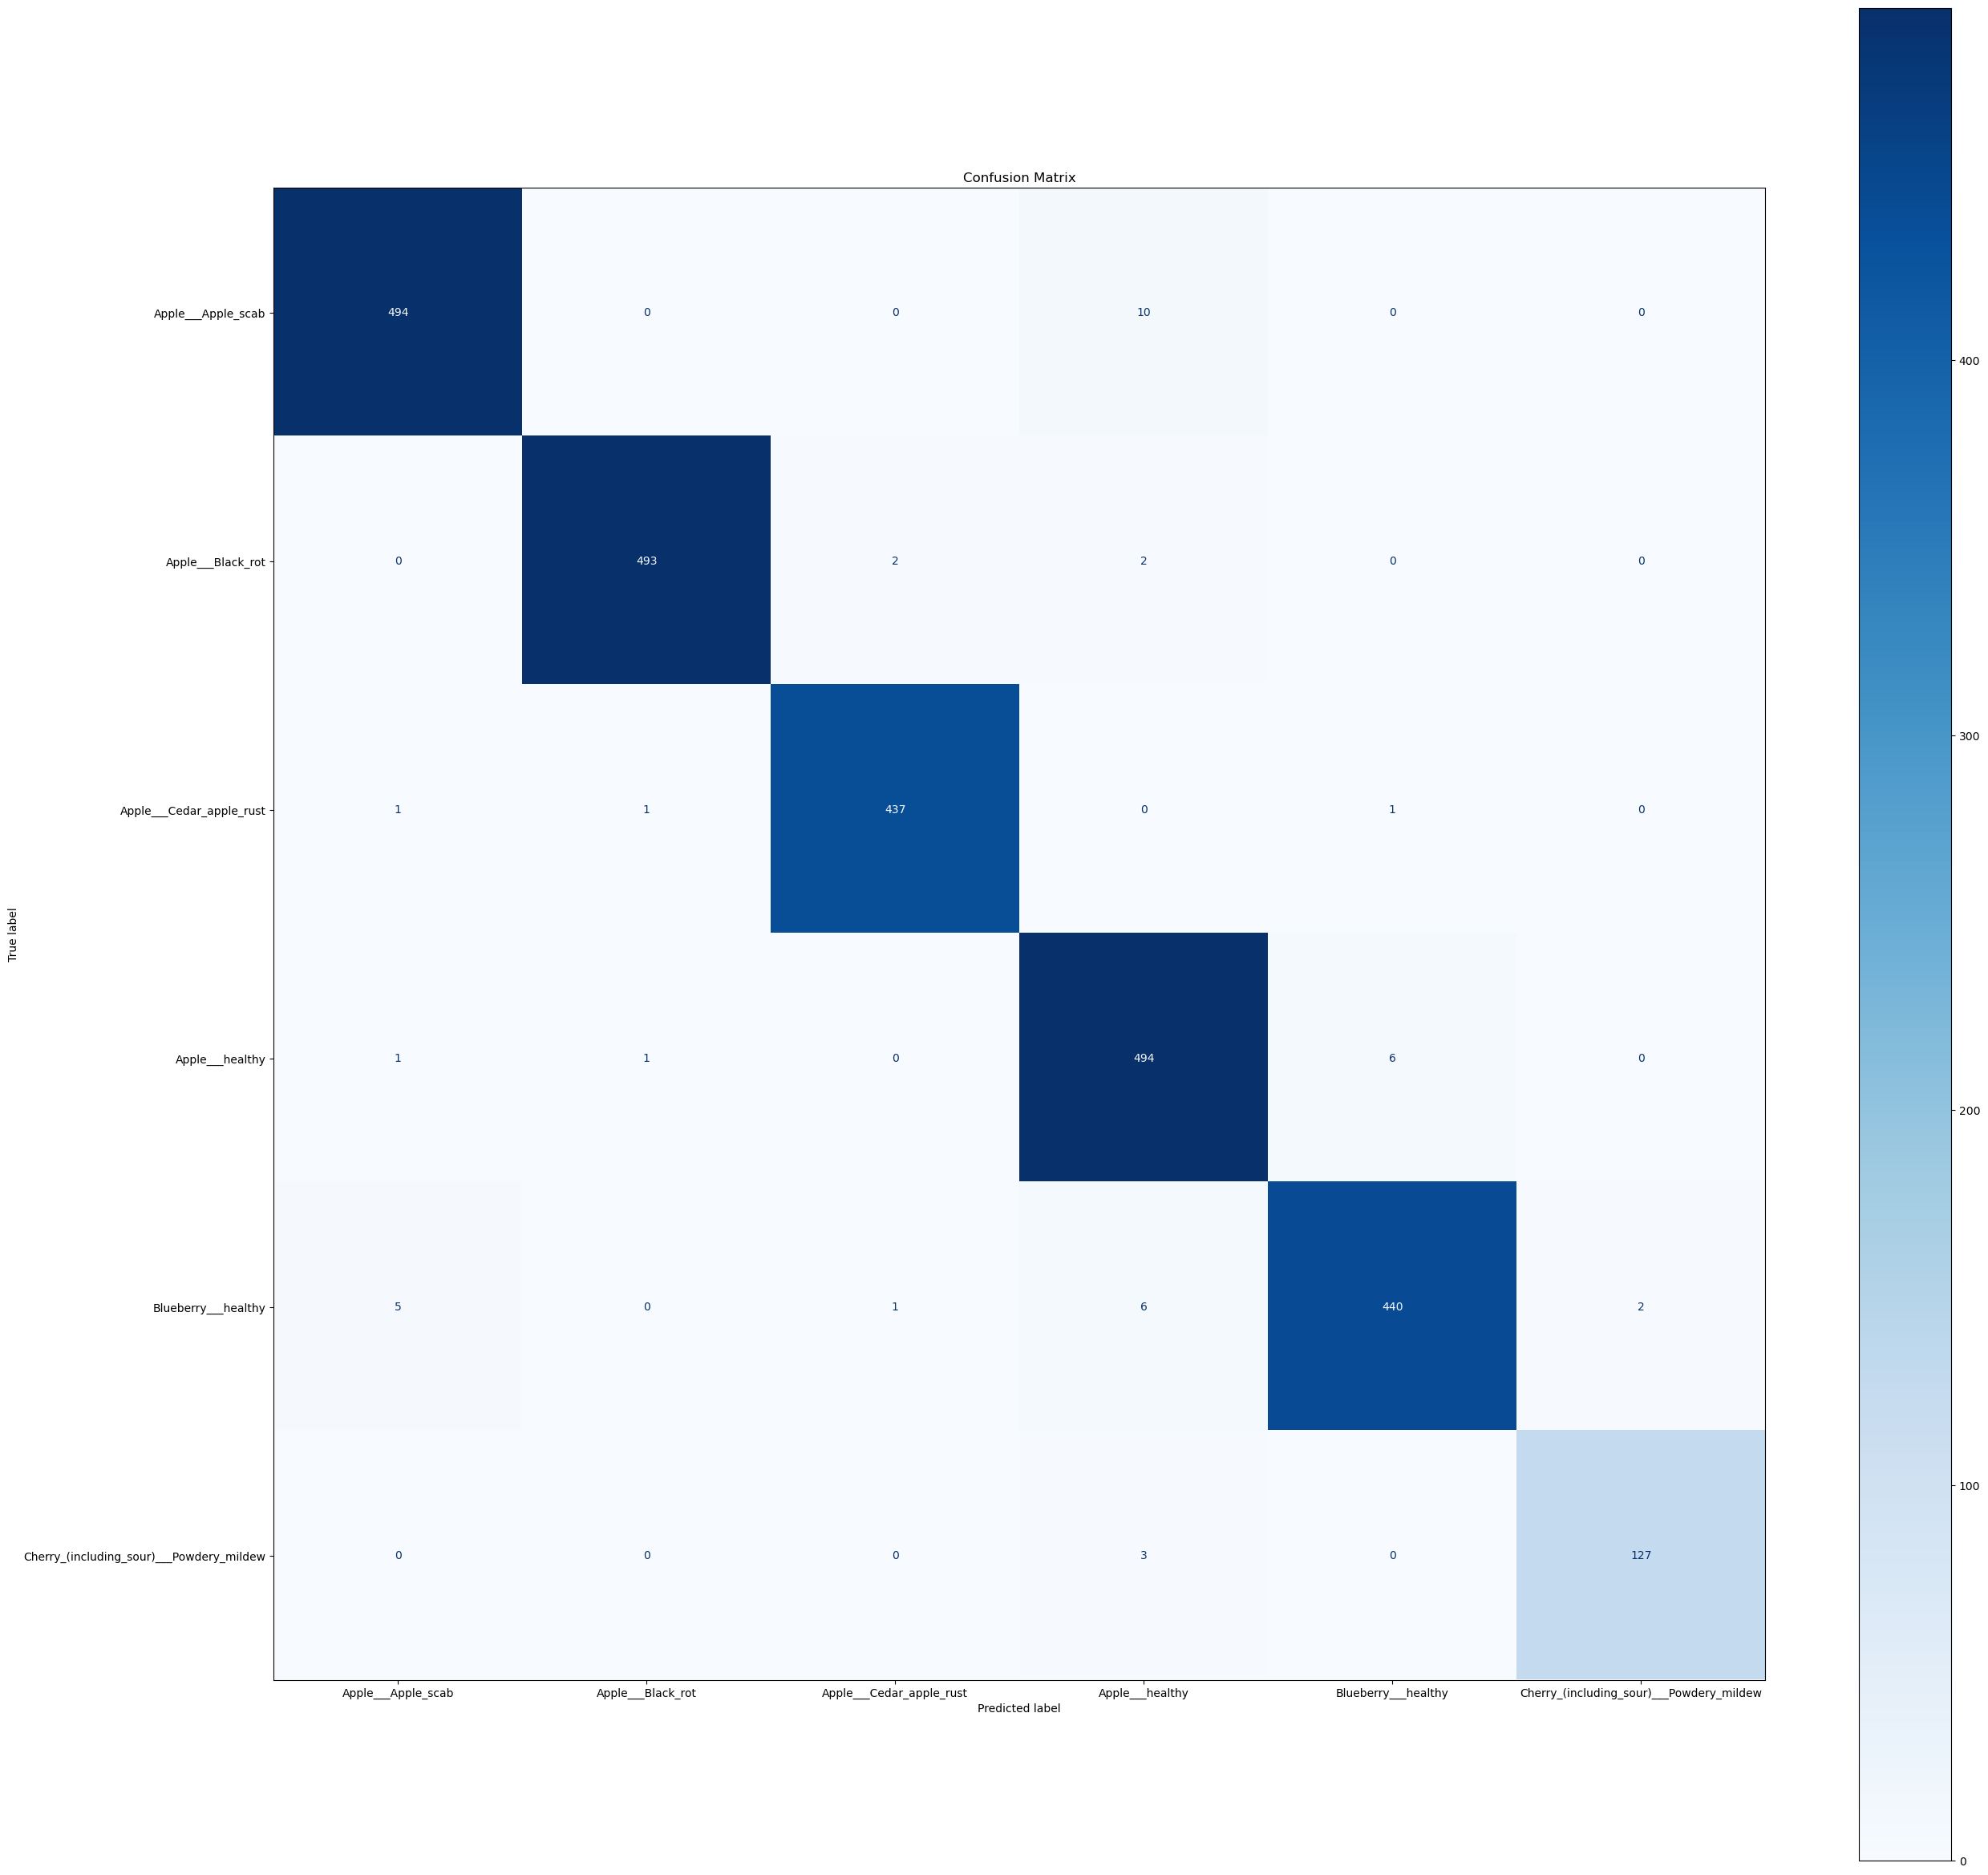

In [21]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# ⚙️ Load the saved model
model = tf.keras.models.load_model('trained_plant_disease_model.keras')

# ⚙️ Reload the validation dataset
valid_set = tf.keras.utils.image_dataset_from_directory(
    r"C:\Users\mandl\Downloads\valid",
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False  # Ensure consistent ordering for matching predictions and labels
)

# 🔥 Get predictions
y_pred_prob = model.predict(valid_set)
y_pred = np.argmax(y_pred_prob, axis=1)

# 🎯 Get true labels
y_true = np.concatenate([np.argmax(y, axis=1) for _, y in valid_set])

# 🟢 Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)
class_names = valid_set.class_names  # Extract class names from the dataset

# 🔥 Display the confusion matrix
fig, ax = plt.subplots(figsize=(30, 30))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, ax=ax)

plt.title('Confusion Matrix')
plt.show()


In [23]:
model_path = 'trained_plant_disease_model.keras'

In [24]:
cnn = tf.keras.models.load_model(model_path)

In [25]:
image_path = r"C:\Users\mandl\OneDrive\Desktop\test\TomatoYellowCurlVirus6.JPG"
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(128, 128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.expand_dims(input_arr, axis=0)

In [26]:
prediction = cnn.predict(input_arr)
result_index = np.argmax(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 594ms/step


In [27]:
class_name = valid_set.class_names
model_prediction = class_name[result_index]

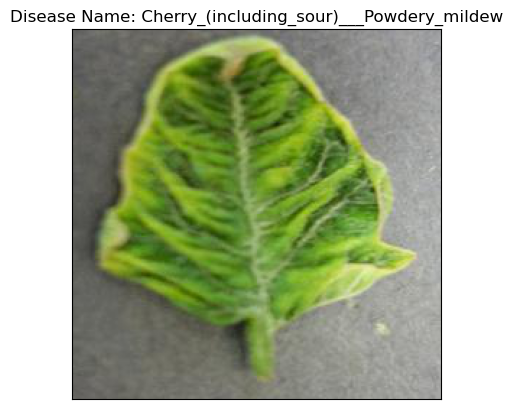

Predicted Disease: Cherry_(including_sour)___Powdery_mildew


In [28]:
plt.imshow(tf.keras.preprocessing.image.load_img(image_path))
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

print("Predicted Disease:", model_prediction)